In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_excel('/content/ml.xlsx')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
# Converting categorical into boolean using get_dummies
# Getting the predicted values in terms of 0 and 1
Y = (df['y'] == 'yes')*1
Y

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
bank_client = df.iloc[: , 0:7]  #[:, 0:7]: (iloc = integer location)This is the indexing expression that specifies the rows and columns to be selected. The colon : before the comma refers to all rows, indicating that we want to select all rows in the DataFrame. The range 0:7 after the comma refers to columns and specifies that we want to select columns from position 0 up to, but not including, position 7.
bank_client.head()


In [ ]:
#for finding all unique values in categorical features
print('job:\n', bank_client['job'].unique())

In [ ]:
print('marital\n', bank_client['marital'].unique())

In [ ]:
print('education\n', bank_client['education'].unique())

In [ ]:
print('default\n', bank_client['default'].unique())

In [ ]:
print('default\n', bank_client['default'].unique())
print('Housing:\n', bank_client['housing'].unique())
print('Loan:\n', bank_client['loan'].unique())

EDA- Exploratory data analysis

step 1- find unwanted columns


**Takeaway**- there are no unwanted columns

In [ ]:
#step 2- find missing values

In [ ]:
df.isna().sum(axis=0) #axis = 0 is col wise and axis= 1 is row wise

**Takeaway-** there are no missing value

# **AGE**

In [ ]:
plt.figure(figsize=(20, 8))
sns.countplot(x='age', data=bank_client)

plt.xlabel('Age', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Age Count Distribution', fontsize=15)

sns.despine()

In [ ]:

plt.figure(figsize=(8, 3))
sns.boxplot(x='age', data=bank_client)

plt.xlabel('People Age', fontsize=10)
plt.ylabel('Age', fontsize=10)
plt.title('Age Distribution', fontsize=10)


sns.despine()

Text(0.5, 1.0, 'Age x Occurrence')

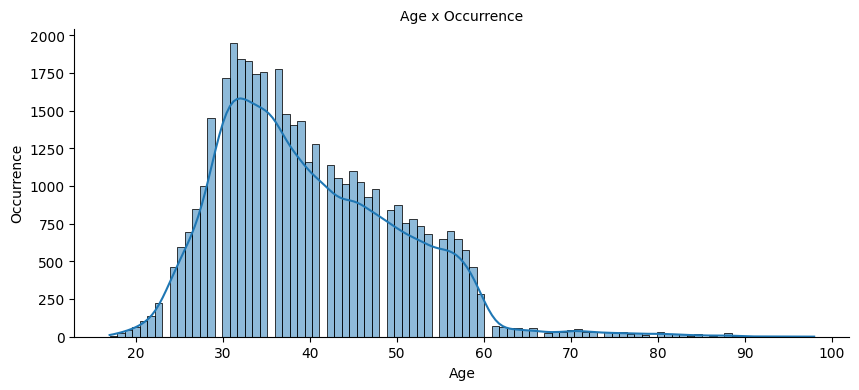

In [ ]:

plt.figure(figsize=(10, 4))

sns.histplot(bank_client['age'],kde="true")

sns.despine()#sns.despine() is used to remove the spines or borders of a plot. helps to improve asthetics of the plot

plt.xlabel('Age', fontsize=10)
plt.ylabel('Occurrence', fontsize=10)
plt.title('Age x Occurrence', fontsize=10)

In [ ]:
print('Number of outliers:', bank_client[bank_client['age'] > 69.6]['age'].count())
print('Number of clients:', len(bank_client))
#Outliers in %
print('Outliers are:', round(bank_client[bank_client['age'] > 69.6]['age'].count()*100/len(bank_client),2), '%')  #round is for ronded to 2 decimal places

Number of outliers: 469
Number of clients: 41188
Outliers are: 1.14 %


In [ ]:
# Calculating some values to evaluete this independent variable
print('MEAN:', round(bank_client['age'].mean(), 1))
# A low standard deviation indicates that the data points tend to be close to the mean or expected value
# A high standard deviation indicates that the data points are scattered
print('STD :', round(bank_client['age'].std(), 1))
# I thing the best way to give a precisly insight abou dispersion is using the CV (coefficient variation) (STD/MEAN)*100
#    cv < 15%, low dispersion
#    cv > 30%, high dispersion
print('CV  :',round(bank_client['age'].std()*100/bank_client['age'].mean(), 1), ', High middle dispersion')

MEAN: 40.0
STD : 10.4
CV  : 26.0 , High middle dispersion


## **JOBS**

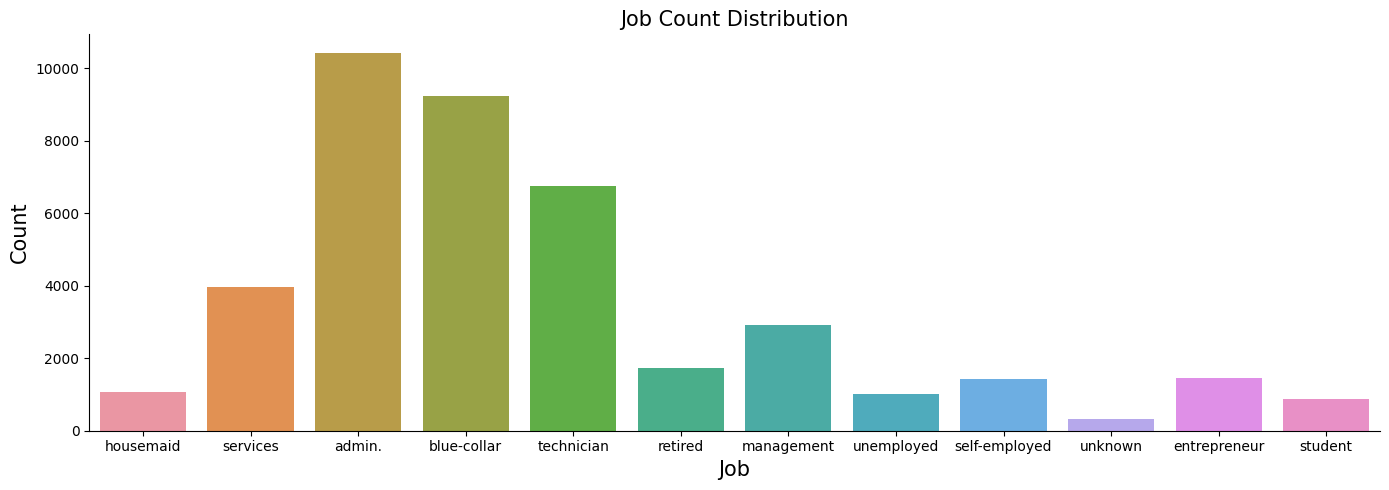

In [ ]:
plt.figure(figsize=(14, 5))

sns.countplot(x='job', data=bank_client)

plt.xlabel('Job', fontsize=15)

plt.ylabel('Count', fontsize=15)
plt.title('Job Count Distribution', fontsize=15)

sns.despine()
plt.tight_layout()

## **Marital**

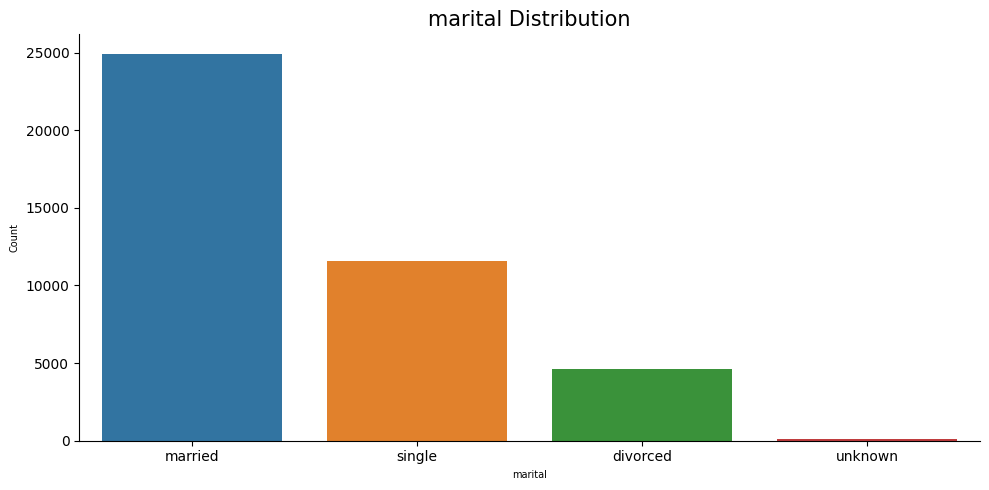

In [ ]:
plt.figure(figsize=(10, 5))

sns.countplot(x = 'marital', data = bank_client)
plt.xlabel('marital', fontsize=7)
plt.ylabel('Count', fontsize=7)
plt.title('marital Distribution', fontsize=15)
sns.despine()
plt.tight_layout()

EDUCATION

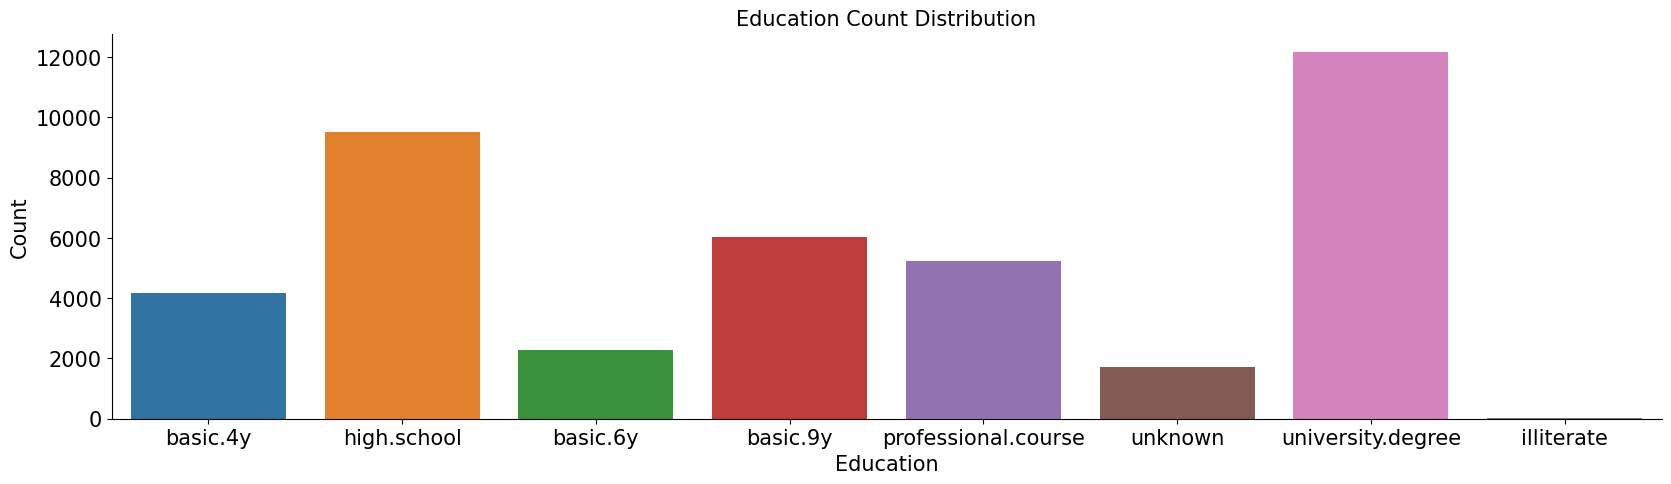

In [ ]:
plt.figure(figsize=(20, 5))
sns.countplot(x='education', data=bank_client)

plt.xlabel('Education', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Education Count Distribution', fontsize=15)
plt.tick_params(labelsize=15)
sns.despine()


DEFAULT, HOUSING, LOAN

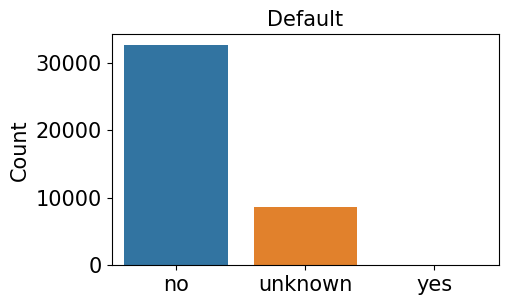

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='default', data=bank_client, order=['no', 'unknown', 'yes'])
plt.title('Default', fontsize=15)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


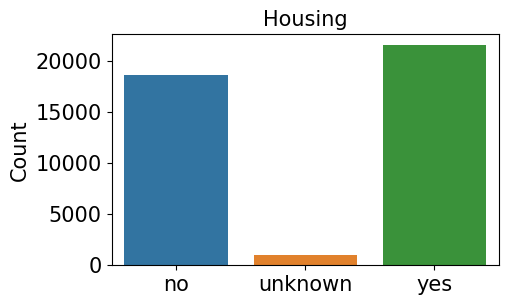

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='housing', data=bank_client, order=['no', 'unknown', 'yes'])
plt.title('Housing', fontsize=15)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()


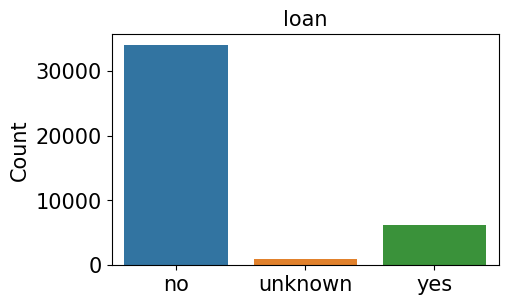

In [ ]:
plt.figure(figsize=(5, 3))
sns.countplot(x='loan', data=bank_client, order=['no', 'unknown', 'yes'])
plt.title('loan', fontsize=15)
plt.xlabel('')
plt.ylabel('Count', fontsize=15)
plt.tick_params(labelsize=15)
plt.show()

In [ ]:
print('Default:\n No credit in default:'     , bank_client[bank_client['default'] == 'no']     ['age'].count(),
              '\n Unknown credit in default:', bank_client[bank_client['default'] == 'unknown']['age'].count(),
              '\n Yes to credit in default:' , bank_client[bank_client['default'] == 'yes']    ['age'].count())

Default:
 No credit in default: 32588 
 Unknown credit in default: 8597 
 Yes to credit in default: 3


In [ ]:
print('Housing:\n No housing in loan:'     , bank_client[bank_client['housing'] == 'no']     ['age'].count(),
              '\n Unknown housing in loan:', bank_client[bank_client['housing'] == 'unknown']['age'].count(),
              '\n Yes to housing in loan:' , bank_client[bank_client['housing'] == 'yes']    ['age'].count())

Housing:
 No housing in loan: 18622 
 Unknown housing in loan: 990 
 Yes to housing in loan: 21576


In [ ]:
print('Housing:\n No to personal loan:'     , bank_client[bank_client['loan'] == 'no']     ['age'].count(),
              '\n Unknown to personal loan:', bank_client[bank_client['loan'] == 'unknown']['age'].count(),
              '\n Yes to personal loan:'    , bank_client[bank_client['loan'] == 'yes']    ['age'].count())

Housing:
 No to personal loan: 33950 
 Unknown to personal loan: 990 
 Yes to personal loan: 6248


BANK CLIENTS CONCLUSION
The ages dont mean to much, has a medium dispersion and dont make sense relate with other variables will not tell any insight

Jobs, Marital and Education i think the best analisys is just the count of each variable, if we related with the other ones its is not conclusive, all this kind of variables has yes, unknown and no for loan, default and housing.



Bank Client Categorical Treatment

In [ ]:
# Label encoder order is alphabetical # label encoding is used for ordinal categorical variable(ranking) for nominal we use one hot encoding
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_client['job']      = labelencoder_X.fit_transform(bank_client['job'])
bank_client['marital']  = labelencoder_X.fit_transform(bank_client['marital'])
bank_client['education']= labelencoder_X.fit_transform(bank_client['education'])
bank_client['default']  = labelencoder_X.fit_transform(bank_client['default'])
bank_client['housing']  = labelencoder_X.fit_transform(bank_client['housing'])
bank_client['loan']     = labelencoder_X.fit_transform(bank_client['loan'])

In [ ]:
#function to creat group of ages, this helps because we have 78 differente values here
def age(dataframe):
    dataframe.loc[dataframe['age'] <= 32, 'age'] = 1
    dataframe.loc[(dataframe['age'] > 32) & (dataframe['age'] <= 47), 'age'] = 2
    dataframe.loc[(dataframe['age'] > 47) & (dataframe['age'] <= 70), 'age'] = 3
    dataframe.loc[dataframe['age'] > 70, 'age'] = 4

    return dataframe;

In [ ]:
bank_client.tail()

,age,job,marital,education,default,housing,loan
41183,73,5,1,5,0,2,0
41184,46,1,1,5,0,0,0
41185,56,5,1,6,0,2,0
41186,44,9,1,5,0,0,0
41187,74,5,1,5,0,2,0


Related with the last contact of the current campaign

In [ ]:
bank_related = df.iloc[: , 7:11]
bank_related.head()

,contact,month,day_of_week,duration
0,telephone,may,mon,261
1,telephone,may,mon,149
2,telephone,may,mon,226
3,telephone,may,mon,151
4,telephone,may,mon,307


In [ ]:
print("Kind of Contact: \n", bank_related['contact'].unique())
print("\nWhich monthis this campaing work: \n", bank_related['month'].unique())
print("\nWhich days of week this campaing work: \n", bank_related['day_of_week'].unique())

Kind of Contact: 
 ['telephone' 'cellular']

Which monthis this campaing work: 
 ['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'mar' 'apr' 'sep']

Which days of week this campaing work: 
 ['mon' 'tue' 'wed' 'thu' 'fri']


DURATION OF CALLS

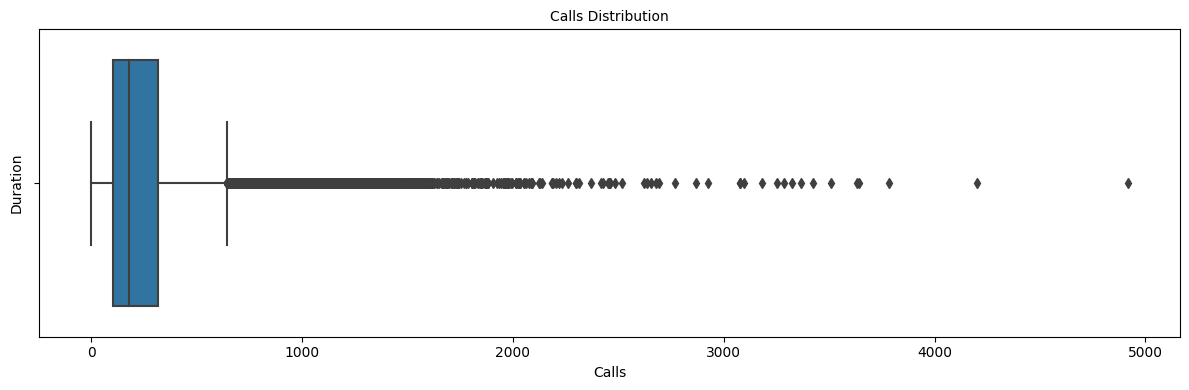

In [ ]:
plt.figure(figsize=(12, 4))
sns.boxplot(x='duration', data=bank_related)

plt.xlabel('Calls', fontsize=10)
plt.ylabel('Duration', fontsize=10)
plt.title('Calls Distribution', fontsize=10)

plt.tight_layout()
plt.show()

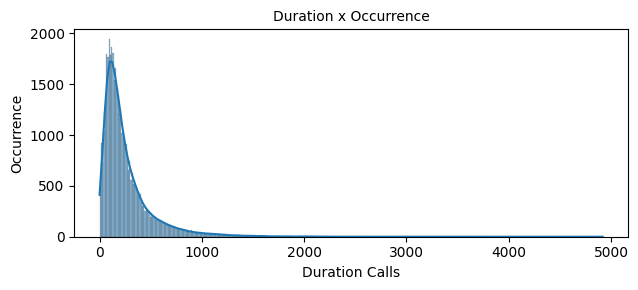

In [ ]:
#plt.figure(figsize=(6.5, 3))
#sns.histplot(bank_related['duration'],kde="true")

#plt.xlabel('Duration Calls', fontsize=10)
#plt.ylabel('Occurrence', fontsize=10)
#plt.title('Duration x Occurrence', fontsize=10)
#plt.tick_params(labelsize=10)

#plt.tight_layout()
#-plt.show()



plt.figure(figsize=(6.5, 3))
sns.histplot(bank_related['duration'], kde=True)
plt.xlabel('Duration Calls', fontsize=10)
plt.ylabel('Occurrence', fontsize=10)
plt.title('Duration x Occurrence', fontsize=10)
plt.tick_params(labelsize=10)
plt.tight_layout()
plt.show()

In [ ]:
print("Max duration  call in minutes:  ", round((bank_related['duration'].max()/60),1))
print("Min duration  call in minutes:   ", round((bank_related['duration'].min()/60),1))
print("Mean duration call in minutes:   ", round((bank_related['duration'].mean()/60),1))
print("STD duration  call in minutes:   ", round((bank_related['duration'].std()/60),1))
# Std close to the mean means that the data values are close to the mean

Max duration  call in minutes:   82.0
Min duration  call in minutes:    0.0
Mean duration call in minutes:    4.3
STD duration  call in minutes:    4.3


In [ ]:
# Quartiles
print('1º Quartile: ', bank_related['duration'].quantile(q = 0.25))
print('2º Quartile: ', bank_related['duration'].quantile(q = 0.50))
print('3º Quartile: ', bank_related['duration'].quantile(q = 0.75))
print('Maximum:     ', bank_related['duration'].max())
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR

print('Duration calls above: ', bank_related['duration'].quantile(q = 0.75) +
                      1.5*(bank_related['duration'].quantile(q = 0.75) - bank_related['duration'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  102.0
2º Quartile:  180.0
3º Quartile:  319.0
Maximum:      4918
Duration calls above:  644.5 are outliers


In [ ]:
print('Numerber of outliers: ', bank_related[bank_related['duration'] > 644.5]['duration'].count())
print('Number of clients: ', len(bank_related))
#Outliers in %
print('Outliers are:', round(bank_related[bank_related['duration'] > 644.5]['duration'].count()*100/len(bank_related),2), '%')

Numerber of outliers:  2963
Number of clients:  41188
Outliers are: 7.19 %


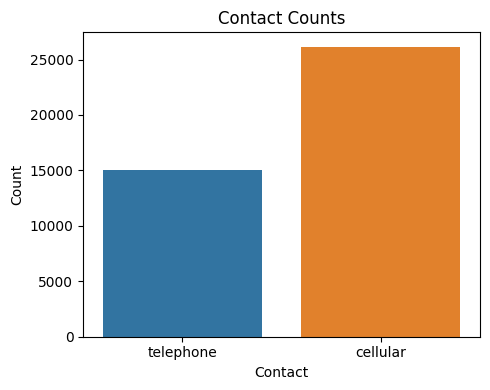

In [ ]:
plt.figure(figsize=(5, 4))
sns.countplot(x='contact', data=bank_related, order=['telephone', 'cellular'])

plt.xlabel('Contact', fontsize=10)
plt.ylabel('Count', fontsize=10)
plt.title('Contact Counts')
plt.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

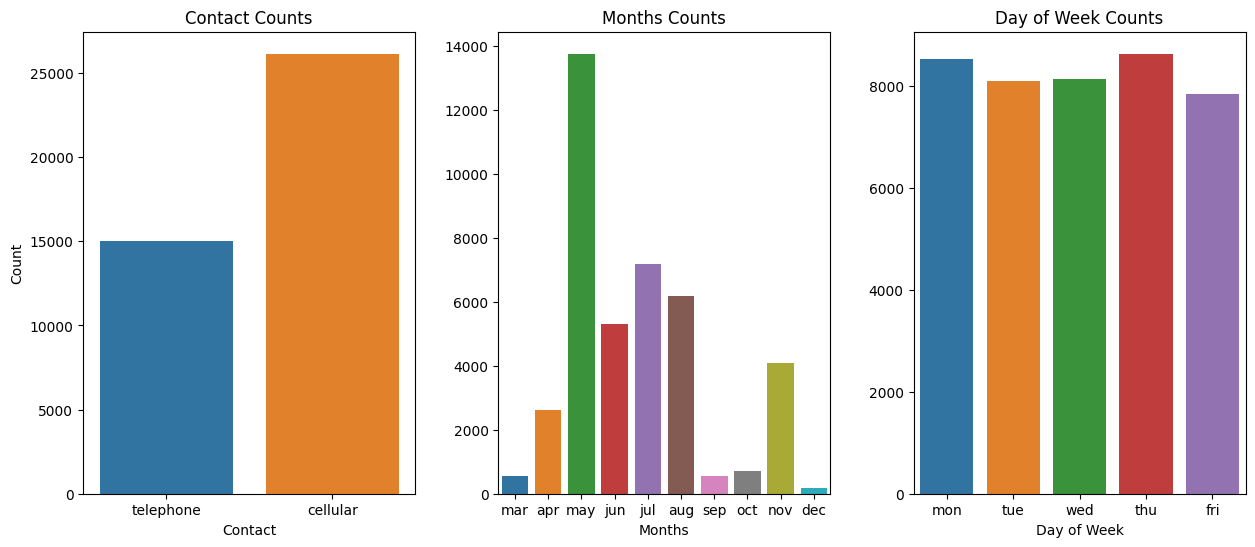

In [ ]:
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(15, 6)) # fig is the whole figure and ax1,ax2, ax3 are subplots

sns.countplot(data=bank_related, x='contact', ax=ax1)
ax1.set_xlabel('Contact', fontsize=10)
ax1.set_ylabel('Count', fontsize=10)
ax1.set_title('Contact Counts')
ax1.tick_params(labelsize=10)

sns.countplot(data=bank_related, x='month', ax=ax2, order=['mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
ax2.set_xlabel('Months', fontsize=10)
ax2.set_ylabel('')
ax2.set_title('Months Counts')
ax2.tick_params(labelsize=10)

sns.countplot(data=bank_related, x='day_of_week', ax=ax3)
ax3.set_xlabel('Day of Week', fontsize=10)
ax3.set_ylabel('')
ax3.set_title('Day of Week Counts')
ax3.tick_params(labelsize=10)

plt.subplots_adjust(wspace=0.25)


 Contact, Month, Day of Week treatment

In [ ]:
# Label encoder order is alphabetical
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
bank_related['contact']     = labelencoder_X.fit_transform(bank_related['contact'])
bank_related['month']       = labelencoder_X.fit_transform(bank_related['month'])
bank_related['day_of_week'] = labelencoder_X.fit_transform(bank_related['day_of_week'])

In [ ]:
bank_related.head()


,contact,month,day_of_week,duration
0,1,6,1,261
1,1,6,1,149
2,1,6,1,226
3,1,6,1,151
4,1,6,1,307


In [ ]:
bank_related.loc[bank_related['duration'] <= 102, 'duration'] = 1
bank_related.loc[(bank_related['duration'] > 102) & (bank_related['duration'] <= 180), 'duration'] = 2
bank_related.loc[(bank_related['duration'] > 180) & (bank_related['duration'] <= 319), 'duration'] = 3
bank_related.loc[(bank_related['duration'] > 319) & (bank_related['duration'] <= 644.5), 'duration'] = 4
bank_related.loc[bank_related['duration'] > 644.5, 'duration'] = 5


In [ ]:
bank_related.head()

,contact,month,day_of_week,duration
0,1,6,1,3
1,1,6,1,2
2,1,6,1,3
3,1,6,1,2
4,1,6,1,3


Social and economic context attributes

In [ ]:
bank_se = df.loc[: , ['emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']]
bank_se.head()

,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.1,93.994,-36.4,4.857,5191
1,1.1,93.994,-36.4,4.857,5191
2,1.1,93.994,-36.4,4.857,5191
3,1.1,93.994,-36.4,4.857,5191
4,1.1,93.994,-36.4,4.857,5191


In [ ]:
bank_o = df.loc[: , ['campaign', 'pdays','previous', 'poutcome']]
bank_o.head()

,campaign,pdays,previous,poutcome
0,1,999,0,nonexistent
1,1,999,0,nonexistent
2,1,999,0,nonexistent
3,1,999,0,nonexistent
4,1,999,0,nonexistent


In [ ]:
bank_o.poutcome.unique()

array(['nonexistent', 'failure', 'success'], dtype=object)

In [ ]:
bank_o['poutcome'].replace(['nonexistent', 'failure', 'success'], [1,2,3], inplace  = True)

In [ ]:
bank_o


,campaign,pdays,previous,poutcome
0,1,999,0,1
1,1,999,0,1
2,1,999,0,1
3,1,999,0,1
4,1,999,0,1
...,...,...,...,...
41183,1,999,0,1
41184,1,999,0,1
41185,2,999,0,1
41186,1,999,0,1


In [ ]:
bank_o.previous.unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

Model

In [ ]:
bank_final= pd.concat([bank_client, bank_related, bank_se, bank_o], axis = 1)

In [ ]:
bank_final.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,campaign,pdays,previous,poutcome
0,56,3,1,0,0,0,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191,1,999,0,1
1,57,7,1,3,1,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191,1,999,0,1
2,37,7,1,3,0,2,0,1,6,1,3,1.1,93.994,-36.4,4.857,5191,1,999,0,1
3,40,0,1,1,0,0,0,1,6,1,2,1.1,93.994,-36.4,4.857,5191,1,999,0,1
4,56,7,1,3,0,0,2,1,6,1,3,1.1,93.994,-36.4,4.857,5191,1,999,0,1


In [ ]:
bank_final.shape

(41188, 20)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(bank_final, Y, test_size = 0.2, random_state = 51)

In [ ]:
X_train.shape

(32950, 20)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import cross_val_score, KFold


logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)
logpred = logmodel.predict(X_test)

print(confusion_matrix(y_test, logpred))
print(round(accuracy_score(y_test, logpred),2)*100)

[[7129  152]
 [ 596  361]]
91.0


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

model = LogisticRegression(solver='saga', max_iter=1000)

# Train the model and make predictions
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.9092012624423403


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, KFold
dtree = DecisionTreeClassifier(criterion='gini') #criterion = entopy, gini
dtree.fit(X_train, y_train)
dtreepred = dtree.predict(X_test)

print(confusion_matrix(y_test, dtreepred))
print(round(accuracy_score(y_test, dtreepred),2)*100)
DTREECV = (cross_val_score(dtree, X_train, y_train, n_jobs=1, scoring='accuracy').mean())
print(DTREECV)

[[6806  475]
 [ 490  467]]
88.0
0.8849772382397572


<ipython-input-62-7873d8288bed>:25: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax_arr[1].plot(fprdtree, tprdtree, 'b', label='Decision Tree', color='blue')
<ipython-input-62-7873d8288bed>:26: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.
  ax_arr[1].plot(fprlog, tprlog, 'b', label='Logistic', color='grey')


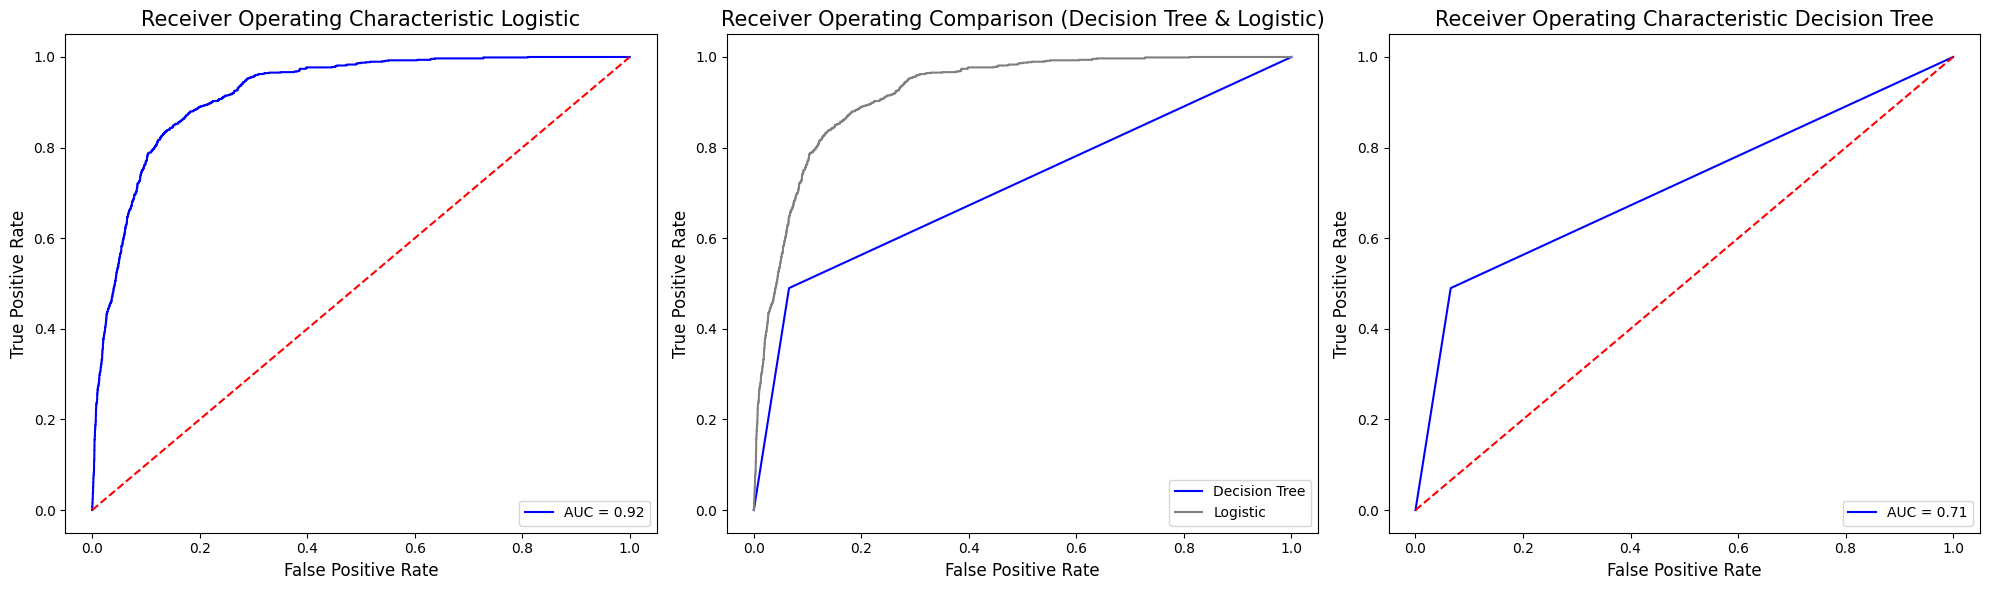

In [ ]:

from sklearn import metrics
import matplotlib.pyplot as plt

fig, ax_arr = plt.subplots(nrows=1, ncols=3, figsize=(20, 6))

# LOGISTIC MODEL
probs = logmodel.predict_proba(X_test)
preds = probs[:, 1]
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_test, preds)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0].plot(fprlog, tprlog, 'b', label='AUC = %0.2f' % roc_auclog)
ax_arr[0].plot([0, 1], [0, 1], 'r--')
ax_arr[0].set_title('Receiver Operating Characteristic Logistic', fontsize=15)
ax_arr[0].set_ylabel('True Positive Rate', fontsize=12)
ax_arr[0].set_xlabel('False Positive Rate', fontsize=12)
ax_arr[0].legend(loc='lower right', prop={'size': 10})

# DECISION TREE and LOGISTIC --------------------
probs = dtree.predict_proba(X_test)
preds = probs[:, 1]
fprdtree, tprdtree, thresholddtree = metrics.roc_curve(y_test, preds)
roc_aucdtree = metrics.auc(fprdtree, tprdtree)

ax_arr[1].plot(fprdtree, tprdtree, 'b', label='Decision Tree', color='blue')
ax_arr[1].plot(fprlog, tprlog, 'b', label='Logistic', color='grey')
ax_arr[1].set_title('Receiver Operating Comparison (Decision Tree & Logistic)', fontsize=15)
ax_arr[1].set_ylabel('True Positive Rate', fontsize=12)
ax_arr[1].set_xlabel('False Positive Rate', fontsize=12)
ax_arr[1].legend(loc='lower right', prop={'size': 10})

# DECISION TREE --------------------
ax_arr[2].plot(fprdtree, tprdtree, 'b', label='AUC = %0.2f' % roc_aucdtree)
ax_arr[2].plot([0, 1], [0, 1], 'r--')
ax_arr[2].set_title('Receiver Operating Characteristic Decision Tree', fontsize=15)
ax_arr[2].set_ylabel('True Positive Rate', fontsize=12)
ax_arr[2].set_xlabel('False Positive Rate', fontsize=12)
ax_arr[2].legend(loc='lower right', prop={'size': 10})

plt.subplots_adjust(wspace=0.3)
plt.tight_layout()
plt.show()
